Courses: CS 5623 
Homework 02: Basic Tools 1
> Student: Kevin Yang
>> ID: 50541650

In [9]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from collections import Counter

%matplotlib inline

In [10]:
# Load the dat into a Pandas DataFrame
df = pd.read_csv('go_track_tracks.csv', sep = ',')

In [11]:
# Show a summary of the data values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 10 columns):
id                163 non-null int64
id_android        163 non-null int64
speed             163 non-null float64
time              163 non-null float64
distance          163 non-null float64
rating            163 non-null int64
rating_bus        163 non-null int64
rating_weather    163 non-null int64
car_or_bus        163 non-null int64
linha             80 non-null object
dtypes: float64(3), int64(6), object(1)
memory usage: 12.8+ KB


In [12]:
df.table()

AttributeError: 'DataFrame' object has no attribute 'table'

Based on the information aboove, we know that there are 10 attributes and each attribute has
163 instances. 

According to the attribute information:
1. go_track_tracks.csv : a list of trajectories
2. id_android: it represents the device used to capture the instance
3. speed: it represents the average speed (Km/H)
4. distance: it represent the total distance (Km)
5. rating: it is an evaluation parameter. Evaluation the traffic is a way to verify the 6. volunteers perception about the traffic during the travel, in orther words, if volunteers move to some place and face traffic jam, maybe they will evaluate 'bad'. (3:good, 2:normal, 1:bad).
6. rating_bus: it is other evaluation parameter. (1: the amount of people inside the bus is little, 2: the bus is not crowded, 3: the bus is crowded)
7. rating_weather: it is another evaluation parameter (2: sunny, 1: raining)
8. car_or_bus: (1: car, 2: bus)
9. linha: information about the bus that does the pathway

In [45]:
# How many rows?
df.shape[1]

10

In [6]:
# What does each row represent?
df_columns = df.columns
print(df_columns)

Index(['id', 'id_android', 'speed', 'time', 'distance', 'rating', 'rating_bus',
       'rating_weather', 'car_or_bus', 'linha'],
      dtype='object')


In [27]:
# How many columns?
df.shape[0]

163

In [5]:
# show some basic statistics about the data using the DateFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,163.0,15607.650307,18644.257138,1.000000,48.500000,158.000000,37991.000000,38092.000000
id_android,163.0,7.386503,7.348742,0.000000,1.000000,4.000000,10.000000,27.000000
speed,163.0,16.704738,16.016168,0.009779,1.591016,16.685368,23.915760,96.206029
time,163.0,0.264272,0.292731,0.002175,0.035978,0.214466,0.390572,1.942948
distance,163.0,5.302411,7.639011,0.001000,0.034500,3.995000,7.333000,55.770000
rating,163.0,2.515337,0.679105,1.000000,2.000000,3.000000,3.000000,3.000000
rating_bus,163.0,0.386503,0.687859,0.000000,0.000000,0.000000,1.000000,3.000000
rating_weather,163.0,0.515337,0.841485,0.000000,0.000000,0.000000,1.000000,2.000000
car_or_bus,163.0,1.466258,0.500397,1.000000,1.000000,1.000000,2.000000,2.000000


In [24]:
# convert the .columns to a list, and chooese a certain attribute to print out
df_list = df["rating"].values
uniqueValues = np.unique(df_list)
print(df_list)

[3 3 3 3 2 2 3 3 3 2 3 3 2 2 2 2 2 3 2 3 1 1 3 3 3 2 3 3 3 3 3 3 3 2 3 3 3
 3 3 2 2 3 3 1 2 3 3 2 2 2 2 2 2 2 2 2 2 3 3 3 2 2 3 3 3 3 3 3 3 3 2 2 2 2
 3 3 3 3 2 3 1 1 3 1 3 3 3 2 2 3 3 3 3 2 1 3 3 3 3 1 3 3 3 3 3 3 3 1 3 2 3
 3 1 1 3 3 2 3 3 3 1 3 2 3 3 2 2 3 3 3 3 2 2 1 1 1 2 3 2 3 3 1 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 2 3 2 3 1 3 3]


In [25]:
# print out the unique/independent values
print(uniqueValues)

[1 2 3]


In [42]:
# count each evaluation occurrence
input_value = df["rating"].values
count_list = Counter(input_value)
print(count_list.items())

dict_items([(3, 101), (2, 45), (1, 17)])


In [28]:
column_list = list(df.columns)[0:-1]

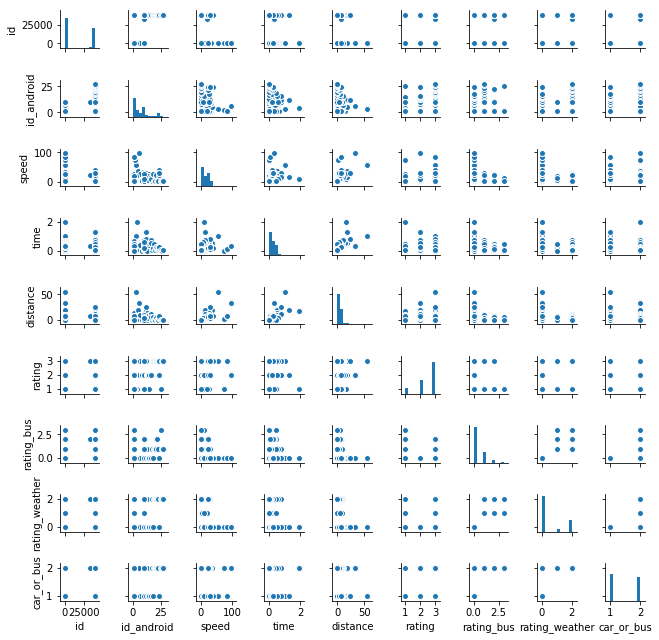

In [32]:
sb.pairplot(df.loc[:,column_list], size = 1)

From the pair plot above, we should separate two part for discussion.
1. The first part is some numeric values, such as speed, time, and distance.
It can tell that they are concentrated at majority part, even though there are some distinct spot at somewhere. Because the majority spot are concentrated, it could tell that most of the data are pretty similar. Based on the finding, we dare to raise a hypothesis that the data collector are depart at the center to everywhere, or even they are only collecting data in a certain area.
2. The second part is about evaluation, such as rating, rating_but, rating_weather.
It only could shows that all the volunteer's experience rate. Moverover, I count the rating occurrence above to illustrate that most of volunteer are satisfied their current bus situation. 
> In a nutshell, at first sight, I thought this will be an interested dataset. But after we narrow down each attribute and some variables, it just tell us the basic situation.


In [61]:
correlation_column = df[['time']]
matrix_column = correlation_column.corr()
print(matrix_column)

      time
time   1.0


In [57]:
df.corr()

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus
id,1.000000,0.610094,-0.098485,0.029410,-0.045866,0.024658,0.486490,0.597534,0.240600
id_android,0.610094,1.000000,0.072475,0.043123,0.025575,0.110744,0.155881,0.244098,-0.077846
speed,-0.098485,0.072475,1.000000,0.190531,0.594457,0.175497,-0.199186,-0.224698,-0.257872
time,0.029410,0.043123,0.190531,1.000000,0.661371,-0.157466,-0.114893,-0.114535,-0.084028
distance,-0.045866,0.025575,0.594457,0.661371,1.000000,0.067579,-0.154358,-0.165319,-0.167561
rating,0.024658,0.110744,0.175497,-0.157466,0.067579,1.000000,-0.151520,0.094103,-0.202823
rating_bus,0.486490,0.155881,-0.199186,-0.114893,-0.154358,-0.151520,1.000000,0.837521,0.603035
rating_weather,0.597534,0.244098,-0.224698,-0.114535,-0.165319,0.094103,0.837521,1.000000,0.657256
car_or_bus,0.240600,-0.077846,-0.257872,-0.084028,-0.167561,-0.202823,0.603035,0.657256,1.000000


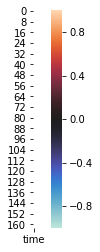

In [62]:
df_heatmap = sb.heatmap(correlation_column, vmin = -1, vmax = 1, center = 0, square = True, linewidths = .1)

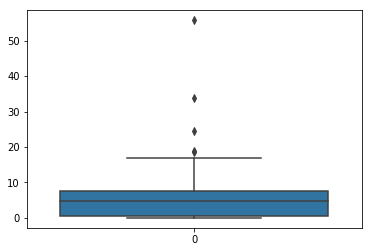

In [64]:
df_column = df["distance"].values
unique_column = np.unique(df_column)
df_boxplot = sb.boxplot(data = unique_column)

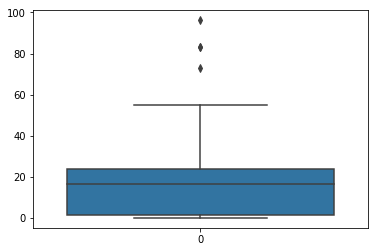

In [70]:
df_boxplot = sb.boxplot(data = df.loc[:, 'speed'])

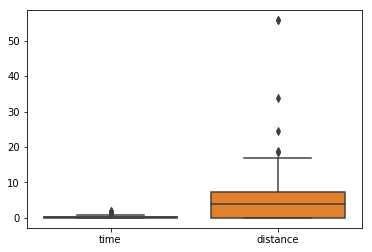

In [69]:
df_two_column = sb.boxplot(data = df.loc[:,['time', 'distance']])

Based on the boxplot above, we can easily see that most of the data are below normal standard deviation.